![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

**Задача** — провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

Saving movies_clean.csv to movies_clean.csv


{'movies_clean.csv': b',poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear\n0,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Shawshank Redemption,15,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"(\'Tim Robbins\',), (\'Morgan Freeman\',), (\'Bob Gunton\',), (\'William Sadler\',)","26,26,905",$28.34M,142.0,28.34\n1,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close bond. They live together in the dormitory, where they plan their latest pranks. When a new headmaster arrives, the students naturally try to overthrow him. A comic war of nitwits follows.",Ertem Egilmez,"(\'Kemal Sunal\',), (\'M\xc3\xbcnir \xc3\x96zkul\',), (\'Halit Ak\xc3\xa7atepe\',), (\'Tarik Akan\',)","40,492",,87.0,\n2,https://m.media

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [ ]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [ ]:
dataset = pd.read_csv('movies_clean.csv')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142.0,28.34
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87.0,NaN
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175.0,134.97
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather: Part II,X,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"('Al Pacino',), ('Robert De Niro',), ('Robert ...","12,49,182",$57.30M,202.0,57.30
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Schindler's List,15,195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"('Liam Neeson',), ('Ralph Fiennes',), ('Ben Ki...","13,33,407",$96.90M,195.0,96.90


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 13)

Выведите информацию о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4970 non-null   object 
 1   title             4970 non-null   object 
 2   certificate       4970 non-null   object 
 3   runtime           4970 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            4970 non-null   float64
 6   about             4956 non-null   object 
 7   director          4970 non-null   object 
 8   stars             4970 non-null   object 
 9   votes             4970 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4970 non-null   float64
 12  gross_earn_clear  4574 non-null   float64
dtypes: float64(3), object(10)
memory usage: 504.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [ ]:
max_value = dataset['gross_earn_clear'].max()
min_value = dataset['gross_earn_clear'].min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [ ]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
540,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141.0,0.0
736,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94.0,0.0
1381,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110.0,0.0
1453,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93.0,0.0
1567,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108.0,0.0
2120,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92.0,0.0
2364,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108.0,0.0
3153,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108.0,0.0
3332,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87.0,0.0
3638,https://m.media-amazon.com/images/S/sash/4Fyxw...,Chalet Girl,12A,97 min,"Comedy, Romance, Sport",6.2,Former skateboard champion Kim wants to make m...,Phil Traill,"('Felicity Jones',), ('Ed Westwick',), ('Bill ...","25,470",$0.00M,97.0,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.01


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [ ]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  49.07882623957876


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [ ]:
median_value = gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  28.345


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [ ]:
percentile_10_value = gross_earn.quantile(0.1)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.5)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  0.7970000000000005
25-й процентиль доходов фильмов:  7.0
50-й процентиль доходов фильмов:  28.345
75-й процентиль доходов фильмов:  63.04
90-й процентиль доходов фильмов:  121.96800000000002


Выведите показатели описательной статистики с помощью метода describe()

In [ ]:
gross_earn.describe()

,gross_earn_clear
count,4558.000000
mean,49.078826
std,67.171717
min,0.010000
25%,7.000000
50%,28.345000
75%,63.040000
max,936.660000


Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [ ]:
import matplotlib.pyplot as plt

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

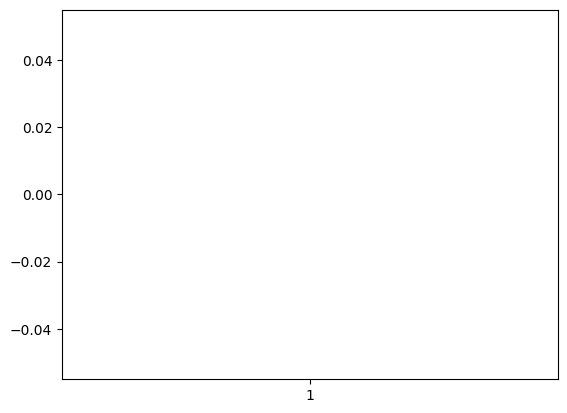

In [ ]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая.  Это связано с наличием пропущенных значений по признаку.
Очистите клонку от пустых значений с помощью dropna и попробуйте заново построить "ящик с усами"

In [ ]:
gross_earn_without_na = gross_earn.dropna()

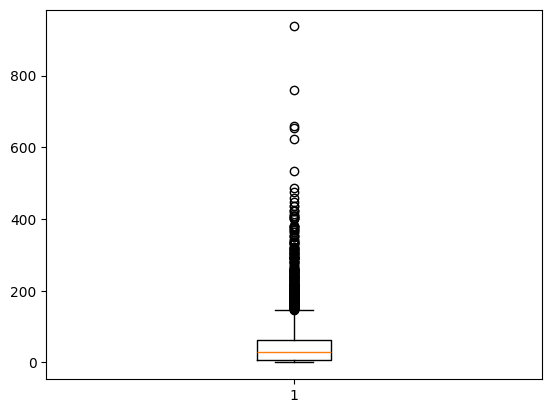

In [ ]:
plt.boxplot(gross_earn_without_na)
plt.show()

<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

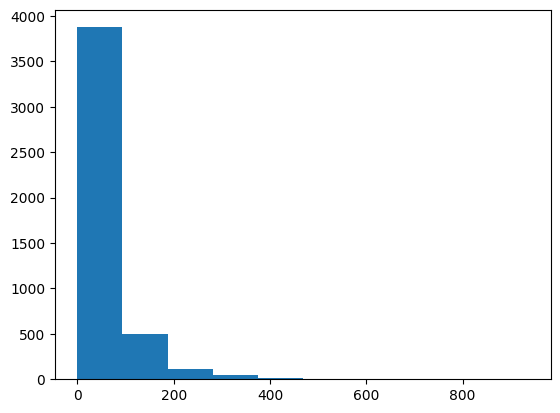

In [ ]:
plt.hist(gross_earn_without_na)
plt.show()

Гистограмма показывает, достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте гистограмму передав в нее параметр bins=20 для лучшей визуализации

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

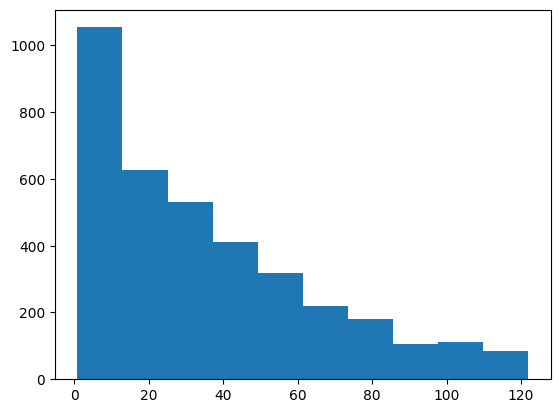

In [ ]:
plt.hist(gross_earn_2)
plt.show()

**Выводы:**

1.   В данных присутствует сильный размах значений, что можно наблюдать исходя из максимального и минимального значений.
2.   В данных присутствуют нулевые значения. Для последующего анализа необходима предоброботка данных, а именно нужно избавиться от нулевых значений признака
3.   Среднее значение признака больше медианы, что может говорить о том, что в данных присутствует сильный размах значений, между максимальными и минимальными значениями, что уже было установлено ранее. Также возможно наличие выбросов среди максимальных значений, что сильно влияет на среднее.
4.   10-й процентиль доходов фильмов: 0.7970000000000005 - Это означает, что 10% фильмов заработали меньше 0.797 миллиона долларов. 25-й процентиль доходов фильмов: 7.0 - Здесь 25% фильмов заработали меньше 7 миллионов долларов. 50-й процентиль доходов фильмов: 28.345 - Половина фильмов заработала меньше 28.345 миллионов долларов. 75-й процентиль доходов фильмов: 63.04 - Это означает, что 75% фильмов заработали меньше 63.04 миллионов долларов. 90-й процентиль доходов фильмов: 121.96800000000002 - Это значение показывает, что 90% фильмов заработали меньше 121.968 миллионов долларов.
5.   Первый ящик с усами (boxplot) получился пустым из-за наличия пустых значений в данных. Для последующего анализа данные необходимо очистить от пропущенных значений. После удаления пустых значений мы получили ящик с усами (boxplot). Полученный ящик имеет небольшой межквартильный диапазон, то есть показатели сосредоточены в узком диапазоне значений. Медиана смещена к нижней части ящика, это говорит о том, что большая часть данных сосредоточена в нижней части диапазона. У ящика короткие усы, что говорит о том, что значения за пределами первого и третьего квартилей находятся в узком диапазоне. Множество точек за пределами усов указывает на наличие значительных отклонений от основной массы данных. Гистограма показывает, что большая часть данных имеет значение до 200 миллионов долларов. Чем больше показатель gross_earn, тем меньше фильмов ему соответствует.

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

,certificate
count,4970
unique,15
top,15
freq,1843


Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].unique()
len(dataset['certificate'].unique())

15

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134
AA,59


Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

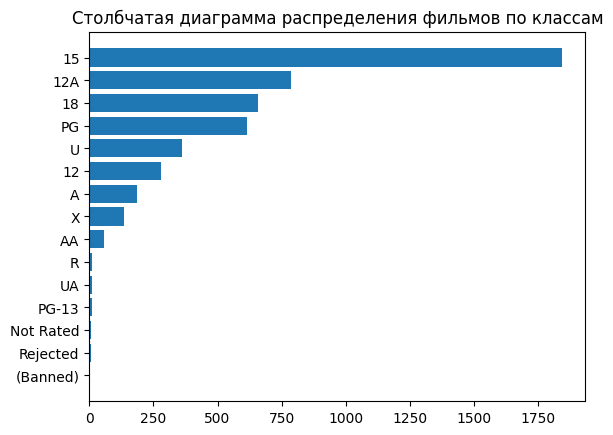

In [ ]:
plt.barh(certificate_counts.index, certificate_counts)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

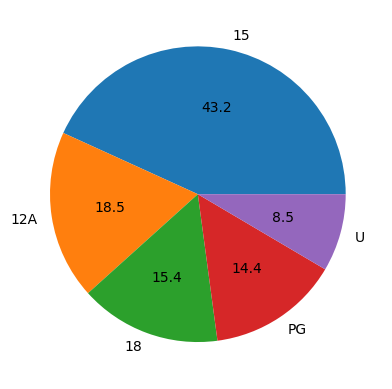

In [ ]:
plt.pie(certificate_counts_top_5, autopct='%.1f', labels=certificate_counts_top_5.index)
plt.show()


**Выводы:**

1. Уникальных значений признака certificate - 15
2. '15' - Наиболее часто встречающееся значение. Оно встречается 1843 раза
3. Наиболее встречаемые значения - '15', '12A', '18', 'PG', 'U'. Наименее встречаемые значения - 'UA', 'PG-13', 'Not Rated', 'Rejected', '(Banned)'
4. Столбчатая диаграмма отражает распределение данных от наиболее часто встречаемого значения - 15, к наименее встречаемому - (Banned). Круговая диаграмма показывает процентное отношение пяти наиболее часто встречающихся значений.

## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

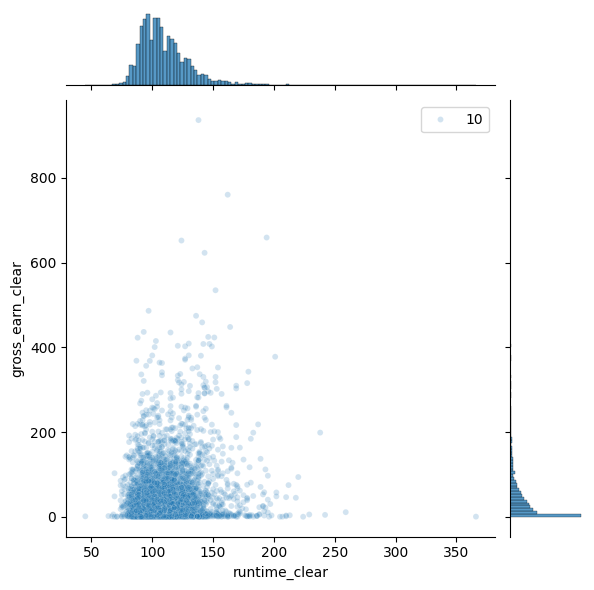

In [ ]:
sns.jointplot(x=dataset['runtime_clear'], y=dataset['gross_earn_clear'], size=10, alpha=0.2)
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

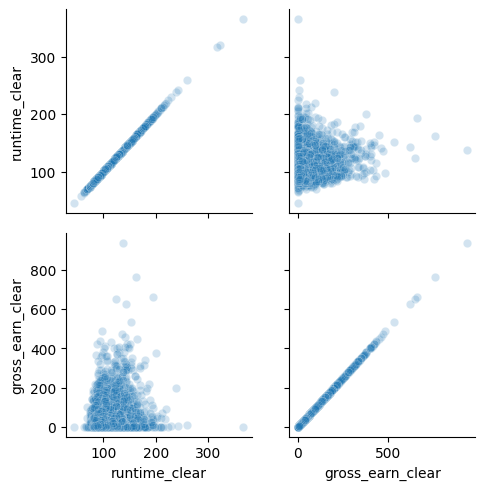

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha=0.2)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset = dataset.copy()
for col in columns:
  limiter = dataset[col].quantile(0.9)
  new_dataset = new_dataset[dataset[col] <= limiter]


<ipython-input-37-bf076391d188>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_dataset = new_dataset[dataset[col] <= limiter]


Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

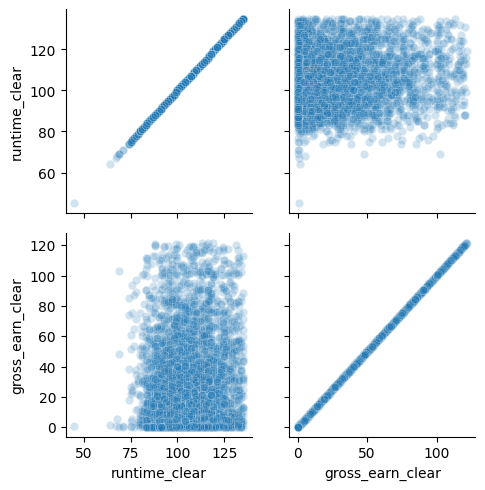

In [ ]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha=0.2)


**Выводы:**

1. Между признаками 'runtime_clear' и 'gross_earn_clear' присутствует нелинейная взаимосвязь

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Clint Eastwood,27
Steven Spielberg,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Shane Acker,1
Jean-Marie Poiré,1
Roger Christian,1


Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object', name='director')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'X': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'PG': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 '12': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Not Rated': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Rejected': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UA': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PG-13': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

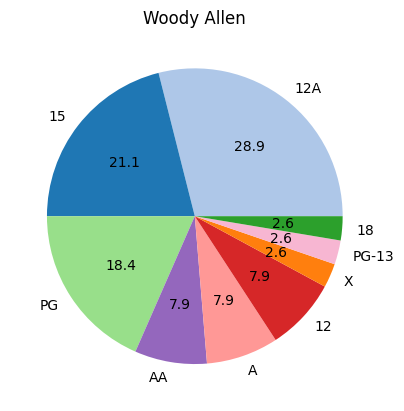

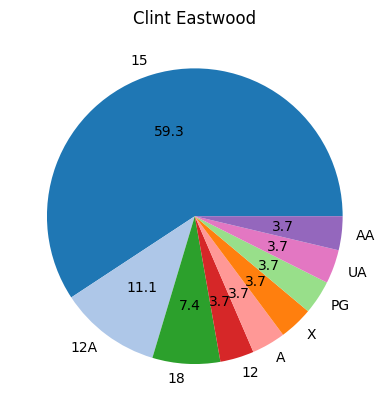

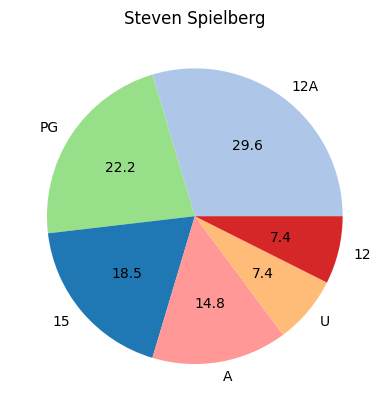

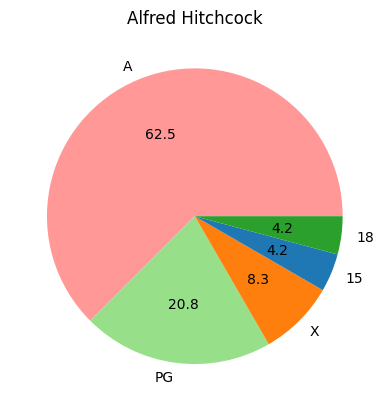

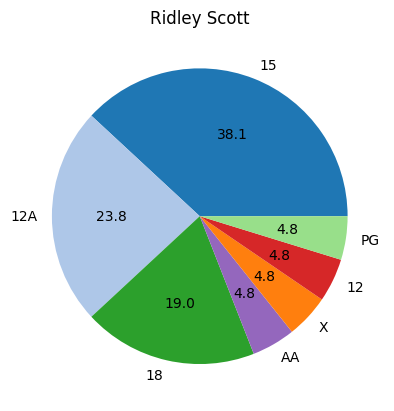

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director'] == director]

  certificate_counts = df['certificate'].value_counts()
  labels = certificate_counts.index

  plt.title(director)
  plt.pie(certificate_counts.values, labels = labels, autopct='%.1f', colors = [colors[key] for key in labels])
  plt.show()


**Выводы:**

Напишите выводы по разделу:
1. Распределения признаков certificate и director не похожи, связь отсутствует
2. 15, 12А, PG занимают лидирующие позиции среди остальных значений признака у режисеров. Среди остальных наиболее выделяется Alfred Hitchcock - у него преобладает признак A и отсутствует 12А, являющееся часто встречаемым значением у других режисеров.

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby('certificate')["gross_earn_clear"].median()

,gross_earn_clear
certificate,
(Banned),NaN
12,41.580
12A,42.650
15,18.840
18,14.945
A,16.140
AA,27.620
Not Rated,0.060
PG,44.340


Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [ ]:
dataset.groupby('certificate')["gross_earn_clear"].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,269.0,60.113048,66.805332,0.04,20.5500,41.580,72.220,659.33
12A,757.0,77.310925,100.261041,0.00,15.2700,42.650,95.000,936.66
15,1719.0,33.451798,42.503809,0.00,3.6100,18.840,45.870,363.07
18,600.0,26.607200,34.639021,0.00,2.5375,14.945,36.875,370.78
A,126.0,37.906190,50.157244,0.01,3.3925,16.140,51.245,260.00
AA,52.0,38.855769,37.479422,0.02,7.2700,27.620,57.635,139.88
Not Rated,5.0,3.830000,8.231376,0.01,0.0200,0.060,0.510,18.55
PG,581.0,64.011360,66.772893,0.01,18.6000,44.340,81.060,402.45


Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

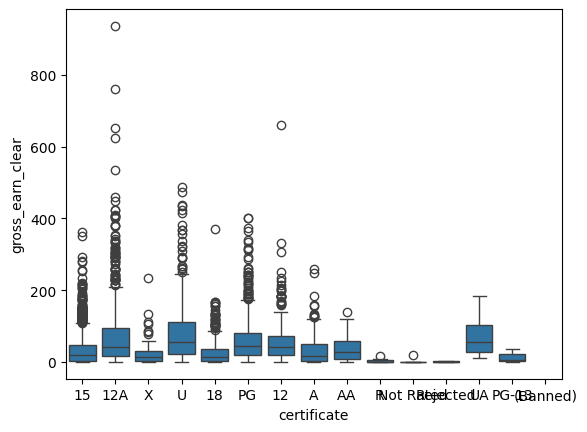

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134
AA,59


По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object', name='certificate')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax (если при очистке признака gross_earn от лишних знаков была сохранена исходная размерность, например, 25.40, то ограничьте значение оси y на отметке 250)

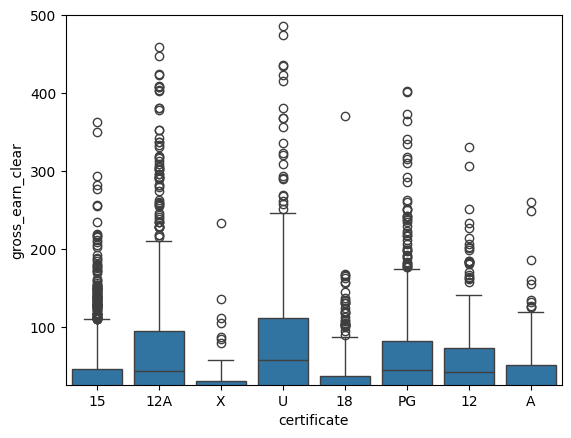

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset_certificate_top_8)
plt.axis(ymin=25.40, ymax=500)
plt.show()

**Выводы:**

U демонстрирует самые высокие медианные показатели, что указывает на её лидерство по частоте появления. 15, X и A имеют наименьшие медианные показатели дохода. 12A и U имеют самый большой разброс значений, X наименьший. Все признаки имеют правостороннюю ассиметрию. Все признаки имеют большое количество выбросов. PG, 12 демонстрируют симметричные распределения. Для большей части фильмов распределение признаков похожи.

## 10. Общий вывод

В анализируемых данных наблюдается значительный размах значений доходов фильмов, что подтверждается различиями между максимальными и минимальными значениями признака gross_earn_clear, а также средним и медианным значениями.

Наличие нулевых и пустых значений дохода требует предварительной предобработки данных для получения более точных результатов.

После очистки данных были выявлены узкие межквартильные диапазоны, указывающие на концентрацию значений в нижней части диапазона, а также наличие выбросов, что может влиять на общую картину распределения доходов.

Взаимосвязь между продолжительностью фильма и его доходами является нелинейной, а распределение сертификатов и режиссеров показывает отсутствие связи между этими признаками.

Наиболее успешными по доходам являются фильмы с оценками 12, 12А и PG, в то время как фильмы с оценками X и A имеют наименьший доход и больше всего выбросов.